<a href="https://colab.research.google.com/github/jovevskaaleksandra/data-analysis-of-testing-results/blob/main/181074_VNP_proekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# Патека до фајлот во Google Drive
file_path = '/content/drive/MyDrive/VNP/CY08MSP_STU_QQQ.SAS7BDAT'

In [6]:
!pip install pandas
!pip install pyreadstat

import pandas as pd
import pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 35.6 MB/s eta 0:00:00


In [7]:
# Вчитување само на првите 1000 редови за брз преглед
df_sample, meta = pyreadstat.read_sas7bdat(file_path, row_limit=1000)

In [ ]:
# Прикажи првите 5 реда
df_sample.head()

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,ALB,8.0,800282.0,800001.0,08MS,000800,ALB03,0080000,800.0,0.0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,ALB,8.0,800115.0,800002.0,08MS,000800,ALB03,0080000,800.0,0.0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,ALB,8.0,800242.0,800003.0,08MS,000800,ALB01,0080000,800.0,0.0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,ALB,8.0,800245.0,800005.0,08MS,000800,ALB08,0080000,800.0,0.0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,ALB,8.0,800285.0,800006.0,08MS,000800,ALB03,0080000,800.0,0.0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26


In [26]:
df_sample.columns

Index(['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM',
       'SUBNATIO', 'REGION', 'OECD',
       ...
       'PV3MPRE', 'PV4MPRE', 'PV5MPRE', 'PV6MPRE', 'PV7MPRE', 'PV8MPRE',
       'PV9MPRE', 'PV10MPRE', 'SENWT', 'VER_DAT'],
      dtype='object', length=1278)

In [27]:
# Ги избирам имињата на колоните што содржат клучни зборови:
# 'MATH' → резултати по математика
# 'READ' → резултати по читање
# 'SCIE' → резултати по наука
# 'ST004' → пол (gender)
# 'ESCS' → социо-економски статус
selected_columns = [col for col in df_sample.columns if 'MATH' in col or 'READ' in col or 'SCIE' in col or 'ST004' in col or 'ESCS' in col]

# Ги прикажувам имињата на избраните колони за да видиме дали сè е во ред
selected_columns

['ST004D01T',
 'MATHPREF',
 'MATHEASE',
 'MATHMOT',
 'MATHEFF',
 'MATHEF21',
 'MATHPERS',
 'ESCS',
 'PV1MATH',
 'PV2MATH',
 'PV3MATH',
 'PV4MATH',
 'PV5MATH',
 'PV6MATH',
 'PV7MATH',
 'PV8MATH',
 'PV9MATH',
 'PV10MATH',
 'PV1READ',
 'PV2READ',
 'PV3READ',
 'PV4READ',
 'PV5READ',
 'PV6READ',
 'PV7READ',
 'PV8READ',
 'PV9READ',
 'PV10READ',
 'PV1SCIE',
 'PV2SCIE',
 'PV3SCIE',
 'PV4SCIE',
 'PV5SCIE',
 'PV6SCIE',
 'PV7SCIE',
 'PV8SCIE',
 'PV9SCIE',
 'PV10SCIE']

In [22]:
# Го вчитувам оригиналниот .sas7bdat фајл, но само со избраните колони
# Така го забрзувам вчитувањето и трошам помалку меморија
df, meta = pyreadstat.read_sas7bdat(file_path, usecols=selected_columns)


In [ ]:
# Го прикажувам почетокот на табелата (првите 5 реда)
df.head()


,ST004D01T,MATHPREF,MATHEASE,MATHMOT,MATHEFF,MATHEF21,MATHPERS,ESCS,PV1MATH,PV2MATH,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,PV6SCIE,PV7SCIE,PV8SCIE,PV9SCIE,PV10SCIE
0,1.0,0.0,0.0,0.0,-1.4413,NaN,-0.0085,1.1112,179.583,201.334,...,335.468,295.861,312.648,263.027,263.343,308.478,309.256,273.810,297.433,353.279
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-3.0507,308.247,304.444,...,315.021,327.293,280.396,270.154,348.569,320.866,275.114,319.327,258.910,319.664
2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.1867,267.514,343.743,...,358.675,344.639,328.467,328.270,309.492,333.690,339.446,290.172,291.706,311.935
3,1.0,0.0,0.0,0.0,-1.3156,2.2322,-0.2546,-3.2198,272.649,300.642,...,214.823,192.366,183.866,163.129,280.386,229.360,197.635,199.556,246.714,193.667
4,1.0,0.0,0.0,0.0,-0.5867,0.9425,-0.1735,-1.0548,435.473,491.174,...,434.997,565.771,417.831,508.182,472.252,425.544,489.097,489.592,388.947,475.359


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Гледам какви вредности има во колоната за пол (ST004D01T)
#    за да се осигурам дека се правилно запишани
df['ST004D01T'].value_counts()


,count
ST004D01T,
2.0,307906
1.0,305759


In [ ]:
# Прикажи уникатни вредности во колоната ST004D01T за да видиш што има во неа
df['ST004D01T'].unique()

array([ 1.,  2., nan])

In [ ]:
# Претворање на бројки во текстуални вредности
df['gender'] = df['ST004D01T'].map({1.0: 'Машко', 2.0: 'Женско'})

# Замена на NaN вредности со 'Не познато'
df['gender'] = df['gender'].fillna('Непознато')

# Прегледај ги првите неколку редови за да видиш како изгледа новата колона
df[['ST004D01T', 'gender']].head()



,ST004D01T,gender
0,1.0,Машко
1,2.0,Женско
2,2.0,Женско
3,1.0,Машко
4,1.0,Машко


In [ ]:
# Проверка на типот на податоци во колоната
df['gender'].dtype
# Треба да е dtype('0') - тоа е за текстуални стринг податоци

dtype('O')

In [ ]:
# Проверка на уникатни вредности во колоната 'gender'
df['gender'].unique()
# треба да има вредности Машко, Женско и Непознато

array(['Машко', 'Женско', 'Непознато'], dtype=object)

In [ ]:
# Проверка дали сите вредности во колоната се стрингови
all(df['gender'].apply(lambda x: isinstance(x, str)))
# Треба да врати true ако се сите вредности стрингови

True

In [ ]:
# Групирам по пол и пресметувам просечни резултати по предмет
average_scores_by_gender = df.groupby('gender')[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean()

# Прикажи ги просечните резултати
average_scores_by_gender

# Објаснување:
# groupby('gender'): Групира податоците по новата колона gender.
# [['PV1MATH', 'PV1READ', 'PV1SCIE']]: Селектира предмети (математика, читање, наука).
# .mean(): Пресметува просечни резултати по групи (по пол).

,PV1MATH,PV1READ,PV1SCIE
gender,,,
Женско,443.664623,425.748769,449.202565
Машко,438.054647,450.761457,451.709571
Непознато,481.395114,541.973582,534.144329


In [ ]:
# Испечати ги просечните резултати
print(average_scores_by_gender)

              PV1MATH     PV1READ     PV1SCIE
gender                                       
Женско     443.664623  425.748769  449.202565
Машко      438.054647  450.761457  451.709571
Непознато  481.395114  541.973582  534.144329


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

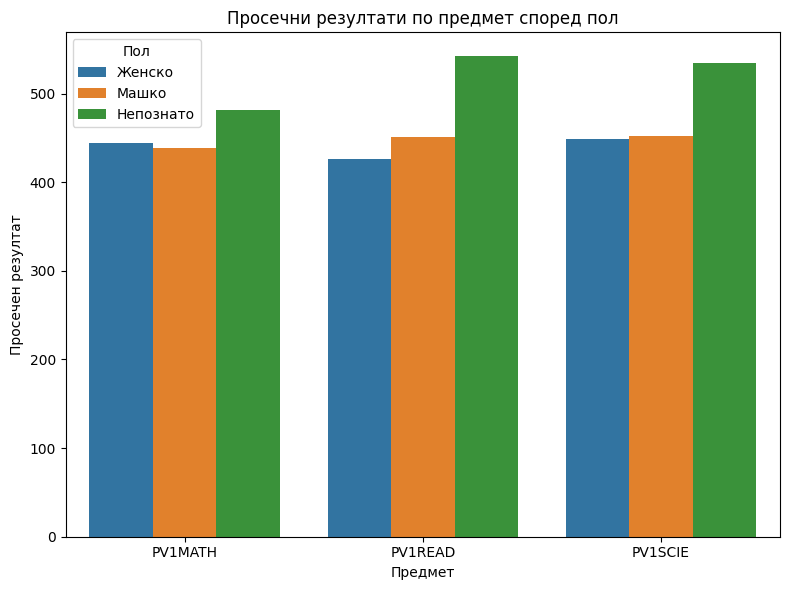

In [ ]:
# Преобликувам податоците за визуелизација
avg_scores = average_scores_by_gender.reset_index().melt(id_vars='gender', var_name='Предмет', value_name='Просек')

# Поставување на големина на графикот
plt.figure(figsize=(8, 6))

# Креирам barplot
sns.barplot(data=avg_scores, x='Предмет', y='Просек', hue='gender')

# Додавам наслов и ознаки
plt.title('Просечни резултати по предмет според пол')
plt.xlabel('Предмет')
plt.ylabel('Просечен резултат')

# Поставување на легенда
plt.legend(title='Пол')

# Покажување на графикот
plt.tight_layout()
plt.show()


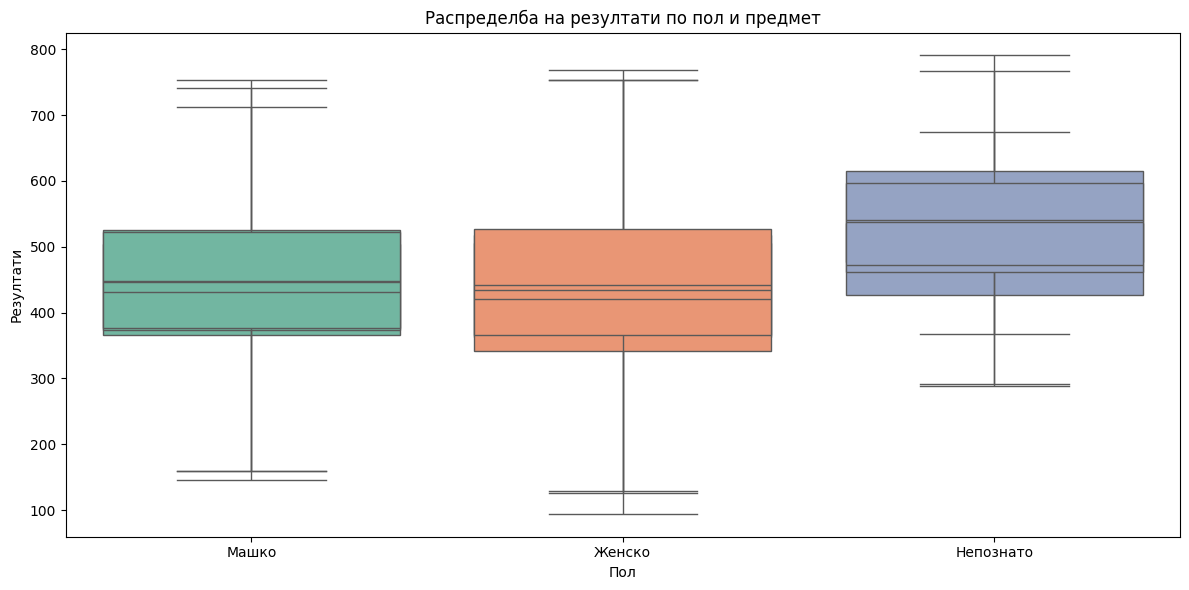

In [ ]:
# Boxplot за распределба на резултати по пол и предмет
plt.figure(figsize=(12, 6))

# Математика
sns.boxplot(data=df, x='gender', y='PV1MATH', hue='gender', palette='Set2', showfliers=False)
# Читање
sns.boxplot(data=df, x='gender', y='PV1READ', hue='gender', palette='Set2', showfliers=False)
# Наука
sns.boxplot(data=df, x='gender', y='PV1SCIE', hue='gender', palette='Set2', showfliers=False)

plt.title('Распределба на резултати по пол и предмет')
plt.xlabel('Пол')
plt.ylabel('Резултати')
plt.tight_layout()
plt.show()

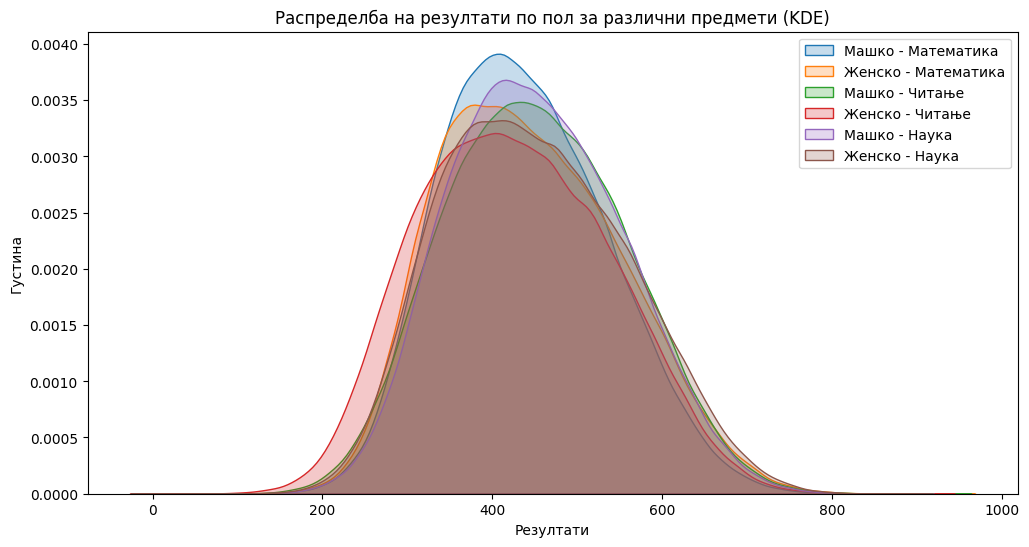

In [ ]:
# KDE за распределба по пол за Математика, Читање и Наука
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['gender'] == 'Машко'], x='PV1MATH', label='Машко - Математика', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Женско'], x='PV1MATH', label='Женско - Математика', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Машко'], x='PV1READ', label='Машко - Читање', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Женско'], x='PV1READ', label='Женско - Читање', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Машко'], x='PV1SCIE', label='Машко - Наука', fill=True)
sns.kdeplot(data=df[df['gender'] == 'Женско'], x='PV1SCIE', label='Женско - Наука', fill=True)

plt.title('Распределба на резултати по пол за различни предмети (KDE)')
plt.xlabel('Резултати')
plt.ylabel('Густина')
plt.legend()
plt.show()

In [31]:
math_columns = [col for col in df_sample.columns if 'MATH' in col]
read_columns = [col for col in df_sample.columns if 'READ' in col]
scie_columns = [col for col in df_sample.columns if 'SCIE' in col]

In [33]:
# Пресметување на просечен резултат за секој предмет
df_sample['MathScore'] = df_sample[math_columns].mean(axis=1)
df_sample['ReadingScore'] = df_sample[read_columns].mean(axis=1)
df_sample['ScienceScore'] = df_sample[scie_columns].mean(axis=1)

In [34]:
# Обединување на овие три листи за да добиеш сите релевантни колони
selected_columns = math_columns + read_columns + scie_columns

In [35]:
# Избор на само тие колони во DataFrame
df_selected = df_sample[selected_columns]

In [36]:
# Додадени колони за пол и социо-економски статус
selected_columns += ['ST004D01T', 'ESCS']

In [41]:
# Проверка на основни статистики
df_selected.describe()

# Проверка на броевите на недефинирани вредности (NaN)
df_selected.isnull().sum()


,0
MATHPREF,318
MATHEASE,332
MATHMOT,327
MATHEFF,372
MATHEF21,387
MATHPERS,398
PV1MATH,0
PV2MATH,0
PV3MATH,0
PV4MATH,0


In [42]:
df_sample_clean = df_sample.fillna(df_sample.mean(numeric_only=True))

In [43]:
# Основни статистики за сите колони
df_sample_clean.describe()

,CNTRYID,CNTSCHID,CNTSTUID,REGION,OECD,ADMINMODE,LANGTEST_QQQ,LANGTEST_COG,LANGTEST_PAQ,Option_CT,...,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,MathScore,ReadingScore,ScienceScore
count,1000.0,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,1000.0,0.0,1000.0,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.0,800148.278000,800615.945000,800.0,0.0,2.0,140.0,140.0,NaN,1.0,...,369.642063,372.675226,371.515893,370.322700,368.330930,369.768091,0.822664,273.545048,358.275918,374.353163
std,0.0,87.636607,353.950136,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,92.154525,88.813342,90.539183,90.120681,89.691278,92.364647,0.331142,72.936062,70.660742,73.470089
min,8.0,800001.000000,800001.000000,800.0,0.0,2.0,140.0,140.0,NaN,1.0,...,90.599000,114.240000,51.199000,103.254000,94.243000,112.950000,0.506310,131.608469,182.231300,159.656500
25%,8.0,800069.750000,800307.750000,800.0,0.0,2.0,140.0,140.0,NaN,1.0,...,306.388250,310.473500,306.606000,306.051750,306.026750,305.270250,0.614030,220.888175,305.684225,319.987875
50%,8.0,800149.000000,800617.000000,800.0,0.0,2.0,140.0,140.0,NaN,1.0,...,363.352000,366.125500,365.819500,367.281000,364.849500,365.489000,0.701750,264.128303,350.334300,364.677900
75%,8.0,800228.000000,800923.250000,800.0,0.0,2.0,140.0,140.0,NaN,1.0,...,428.229750,429.573250,432.426000,428.232250,428.393000,431.892250,0.871830,311.850462,407.871600,426.444325
max,8.0,800296.000000,801229.000000,800.0,0.0,2.0,140.0,140.0,NaN,1.0,...,666.305000,658.790000,722.253000,768.589000,684.703000,660.578000,3.453920,551.316500,616.397200,640.554000


In [44]:
print(df_sample_clean[['MathScore', 'ReadingScore', 'ScienceScore', 'ESCS']].describe())

         MathScore  ReadingScore  ScienceScore         ESCS
count  1000.000000   1000.000000   1000.000000  1000.000000
mean    273.545048    358.275918    374.353163    -0.760239
std      72.936062     70.660742     73.470089     1.023561
min     131.608469    182.231300    159.656500    -3.802500
25%     220.888175    305.684225    319.987875    -1.519025
50%     264.128303    350.334300    364.677900    -0.760239
75%     311.850462    407.871600    426.444325    -0.010400
max     551.316500    616.397200    640.554000     2.343600


In [46]:
gender_group = df_sample_clean.groupby('ST004D01T')[['MathScore', 'ReadingScore', 'ScienceScore']].mean()
print(gender_group)

            MathScore  ReadingScore  ScienceScore
ST004D01T                                        
1.0        269.436094    378.897871    389.469085
2.0        277.720275    337.321353    358.993436


In [47]:
from scipy.stats import ttest_ind

# Поделба по пол: 1 = машки, 2 = женски (ST004D01T)
male = df_sample_clean[df_sample_clean['ST004D01T'] == 1.0]
female = df_sample_clean[df_sample_clean['ST004D01T'] == 2.0]

# t-тестови по предмет
t_math = ttest_ind(male['MathScore'], female['MathScore'])
t_read = ttest_ind(male['ReadingScore'], female['ReadingScore'])
t_science = ttest_ind(male['ScienceScore'], female['ScienceScore'])

print("MathScore t-test:", t_math)
print("ReadingScore t-test:", t_read)
print("ScienceScore t-test:", t_science)

MathScore t-test: TtestResult(statistic=np.float64(-1.7978274070997884), pvalue=np.float64(0.07250652520141368), df=np.float64(998.0))
ReadingScore t-test: TtestResult(statistic=np.float64(9.729399822173496), pvalue=np.float64(1.9535260913055528e-21), df=np.float64(998.0))
ScienceScore t-test: TtestResult(statistic=np.float64(6.70097067351811), pvalue=np.float64(3.455461788100575e-11), df=np.float64(998.0))


<ipython-input-49-5f3b954d1bf1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ST004D01T', y='MathScore', data=df_sample_clean, palette='pastel')
<ipython-input-49-5f3b954d1bf1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ST004D01T', y='ReadingScore', data=df_sample_clean, palette='pastel')
<ipython-input-49-5f3b954d1bf1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ST004D01T', y='ScienceScore', data=df_sample_clean, palette='pastel')


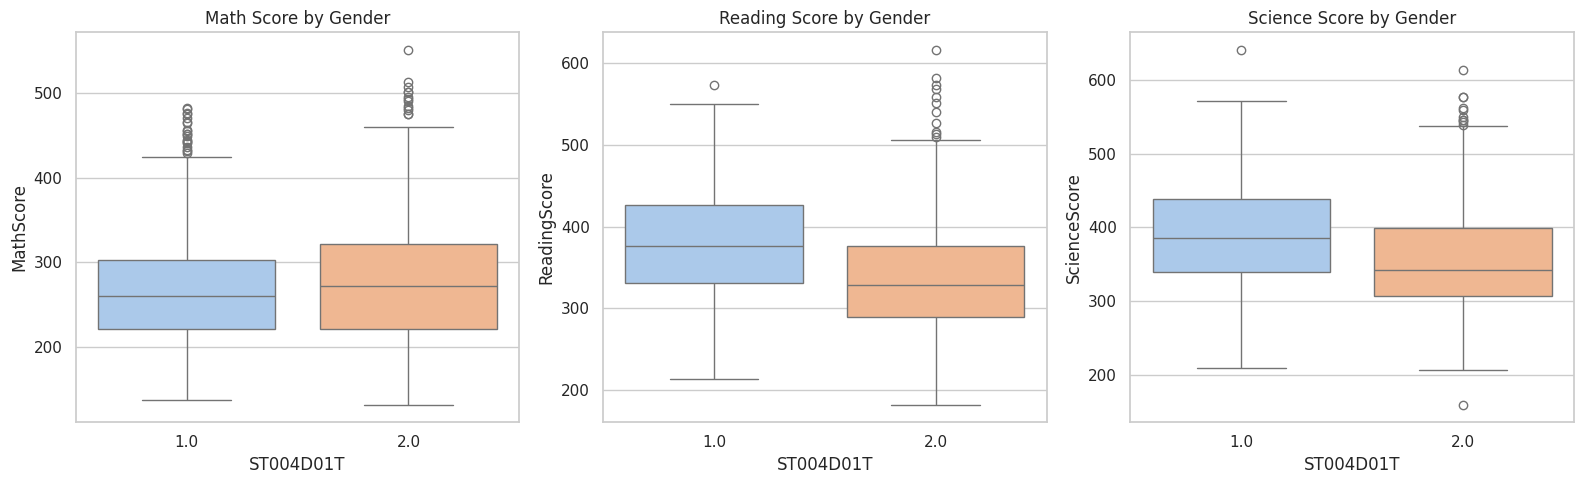

In [49]:
# Подесување на стилот
sns.set(style="whitegrid")

# Го поставуваме графикот
plt.figure(figsize=(16, 5))

# MathScore
plt.subplot(1, 3, 1)
sns.boxplot(x='ST004D01T', y='MathScore', data=df_sample_clean, palette='pastel')
plt.title('Math Score by Gender')

# ReadingScore
plt.subplot(1, 3, 2)
sns.boxplot(x='ST004D01T', y='ReadingScore', data=df_sample_clean, palette='pastel')
plt.title('Reading Score by Gender')

# ScienceScore
plt.subplot(1, 3, 3)
sns.boxplot(x='ST004D01T', y='ScienceScore', data=df_sample_clean, palette='pastel')
plt.title('Science Score by Gender')

plt.tight_layout()
plt.show()

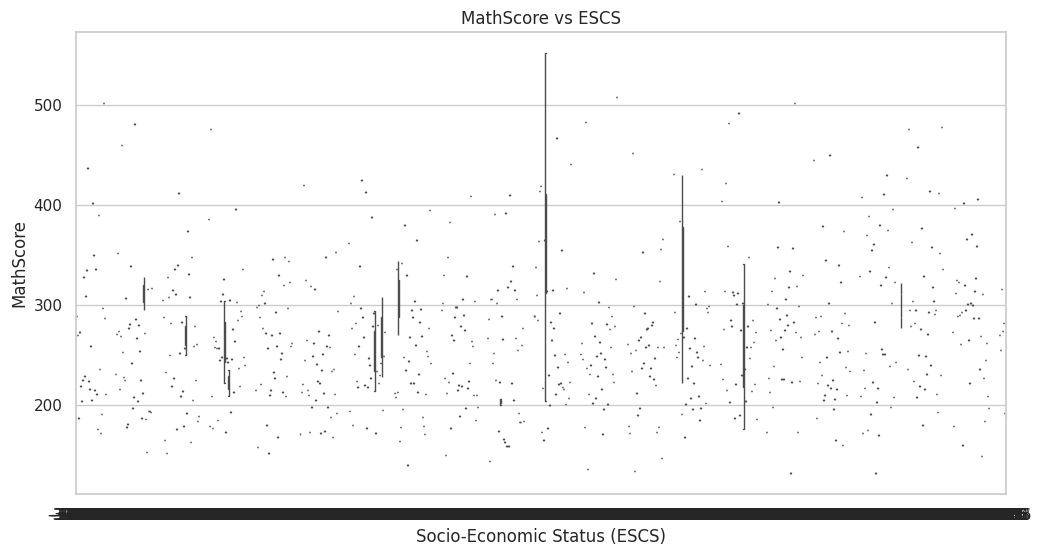

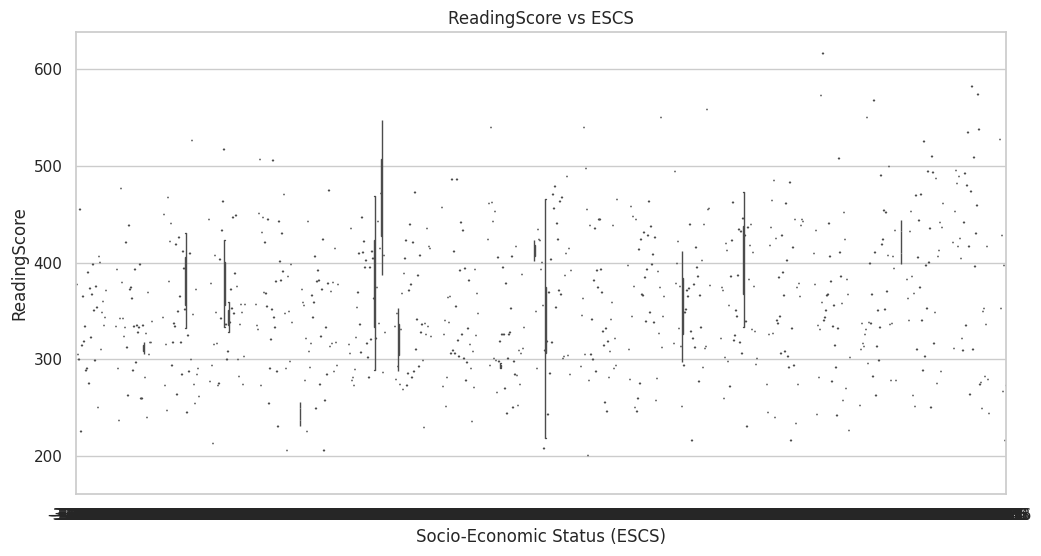

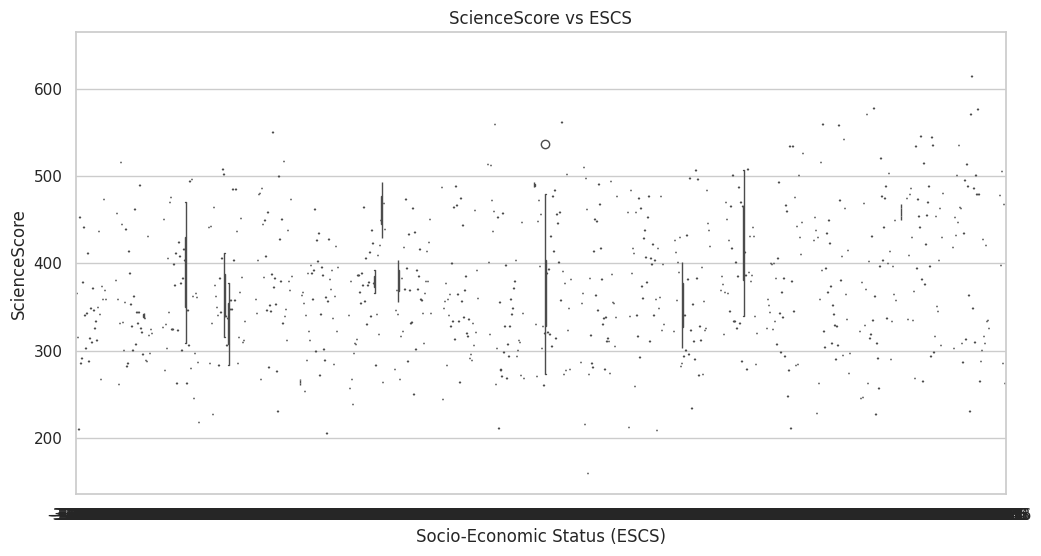

In [50]:
# Boxplot за MathScore врз основа на ESCS
plt.figure(figsize=(12, 6))
sns.boxplot(x='ESCS', y='MathScore', data=df_sample_clean)
plt.title('MathScore vs ESCS')
plt.xlabel('Socio-Economic Status (ESCS)')
plt.ylabel('MathScore')
plt.show()

# Boxplot за ReadingScore врз основа на ESCS
plt.figure(figsize=(12, 6))
sns.boxplot(x='ESCS', y='ReadingScore', data=df_sample_clean)
plt.title('ReadingScore vs ESCS')
plt.xlabel('Socio-Economic Status (ESCS)')
plt.ylabel('ReadingScore')
plt.show()

# Boxplot за ScienceScore врз основа на ESCS
plt.figure(figsize=(12, 6))
sns.boxplot(x='ESCS', y='ScienceScore', data=df_sample_clean)
plt.title('ScienceScore vs ESCS')
plt.xlabel('Socio-Economic Status (ESCS)')
plt.ylabel('ScienceScore')
plt.show()

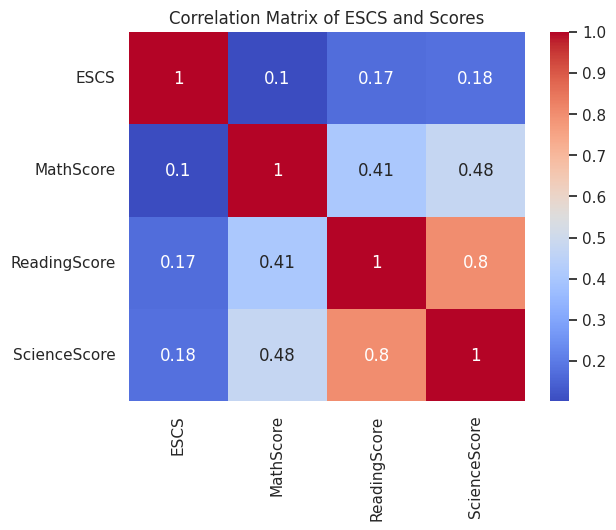

In [51]:
# Пресметај корелација помеѓу ESCS и резултатите
correlation_esc_scores = df_sample_clean[['ESCS', 'MathScore', 'ReadingScore', 'ScienceScore']].corr()

# Визуелизирај ја корелацијата со heatmap
sns.heatmap(correlation_esc_scores, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of ESCS and Scores')
plt.show()

In [54]:
from scipy.stats import f_oneway
# Разделување на податоците по нивоа на ESCS
low_esc = df_sample_clean[df_sample_clean['ESCS'] <= df_sample_clean['ESCS'].quantile(0.33)]
medium_esc = df_sample_clean[(df_sample_clean['ESCS'] > df_sample_clean['ESCS'].quantile(0.33)) & (df_sample_clean['ESCS'] <= df_sample_clean['ESCS'].quantile(0.66))]
high_esc = df_sample_clean[df_sample_clean['ESCS'] > df_sample_clean['ESCS'].quantile(0.66)]

# ANOVA тест за MathScore
f_stat, p_value = f_oneway(low_esc['MathScore'], medium_esc['MathScore'], high_esc['MathScore'])
print(f'MathScore ANOVA p-value: {p_value}')

# ANOVA тест за ReadingScore
f_stat, p_value = f_oneway(low_esc['ReadingScore'], medium_esc['ReadingScore'], high_esc['ReadingScore'])
print(f'ReadingScore ANOVA p-value: {p_value}')

# ANOVA тест за ScienceScore
f_stat, p_value = f_oneway(low_esc['ScienceScore'], medium_esc['ScienceScore'], high_esc['ScienceScore'])
print(f'ScienceScore ANOVA p-value: {p_value}')

MathScore ANOVA p-value: 0.00010375958204599347
ReadingScore ANOVA p-value: 5.306721244609623e-06
ScienceScore ANOVA p-value: 9.730690891908101e-06


<ipython-input-55-43e174e6dbf6>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_sample_clean['ESCS_group'] = pd.cut(df_sample_clean['ESCS'],
<ipython-input-55-43e174e6dbf6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ESCS_group', y='MathScore', data=df_sample_clean, ax=axes[0], palette="Set2")
<ipython-input-55-43e174e6dbf6>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ESCS_group', y='ReadingScore', data=df_sample_clean, ax=axes[1], palette=

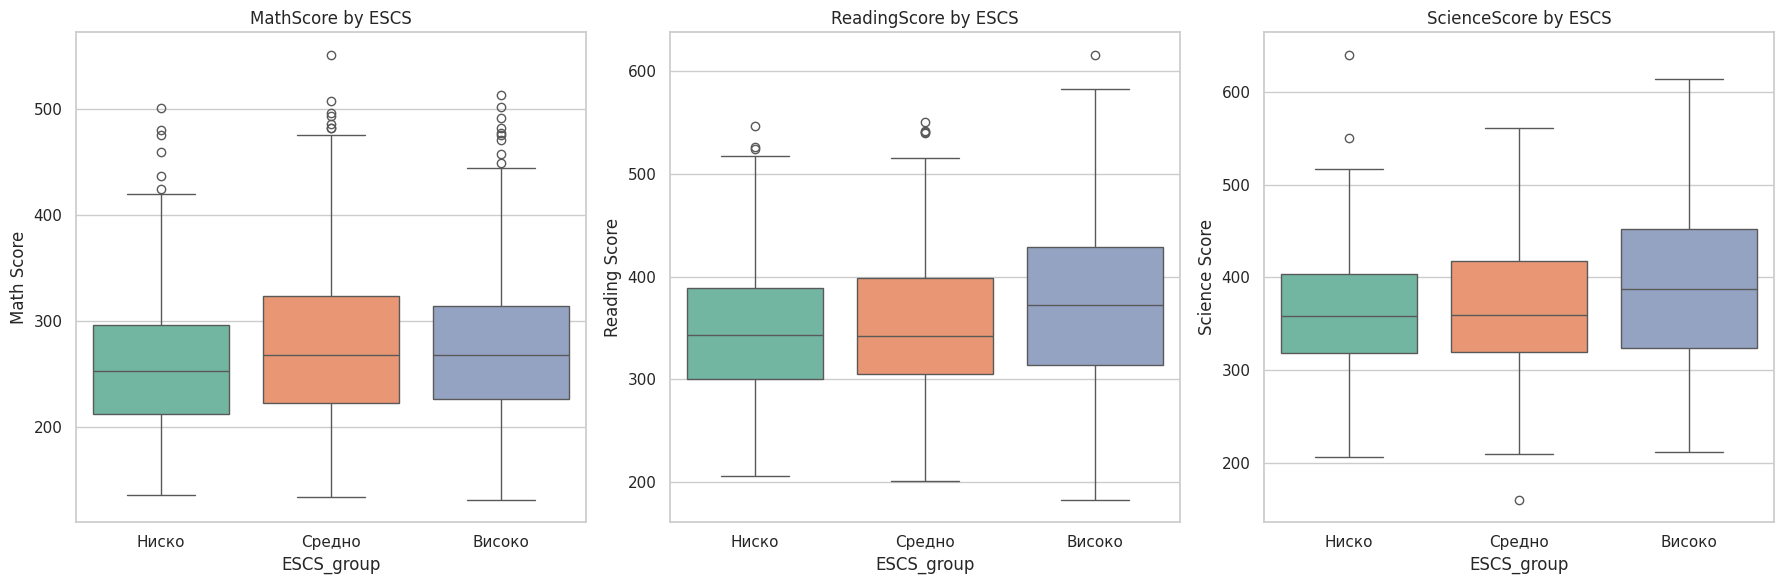

In [55]:
df_sample_clean['ESCS_group'] = pd.cut(df_sample_clean['ESCS'],
                                       bins=[-float('inf'), df_sample_clean['ESCS'].quantile(0.33), df_sample_clean['ESCS'].quantile(0.66), float('inf')],
                                       labels=['Ниско', 'Средно', 'Високо'])

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot MathScore
sns.boxplot(x='ESCS_group', y='MathScore', data=df_sample_clean, ax=axes[0], palette="Set2")
axes[0].set_title('MathScore by ESCS')
axes[0].set_ylabel('Math Score')

# Boxplot ReadingScore
sns.boxplot(x='ESCS_group', y='ReadingScore', data=df_sample_clean, ax=axes[1], palette="Set2")
axes[1].set_title('ReadingScore by ESCS')
axes[1].set_ylabel('Reading Score')

# Boxplot ScienceScore
sns.boxplot(x='ESCS_group', y='ScienceScore', data=df_sample_clean, ax=axes[2], palette="Set2")
axes[2].set_title('ScienceScore by ESCS')
axes[2].set_ylabel('Science Score')

plt.tight_layout()
plt.show()

In [56]:
country_performance = df_sample_clean.groupby('CNTRYID')[['MathScore', 'ReadingScore', 'ScienceScore']].mean()
print(country_performance)

          MathScore  ReadingScore  ScienceScore
CNTRYID                                        
8.0      273.545048    358.275918    374.353163


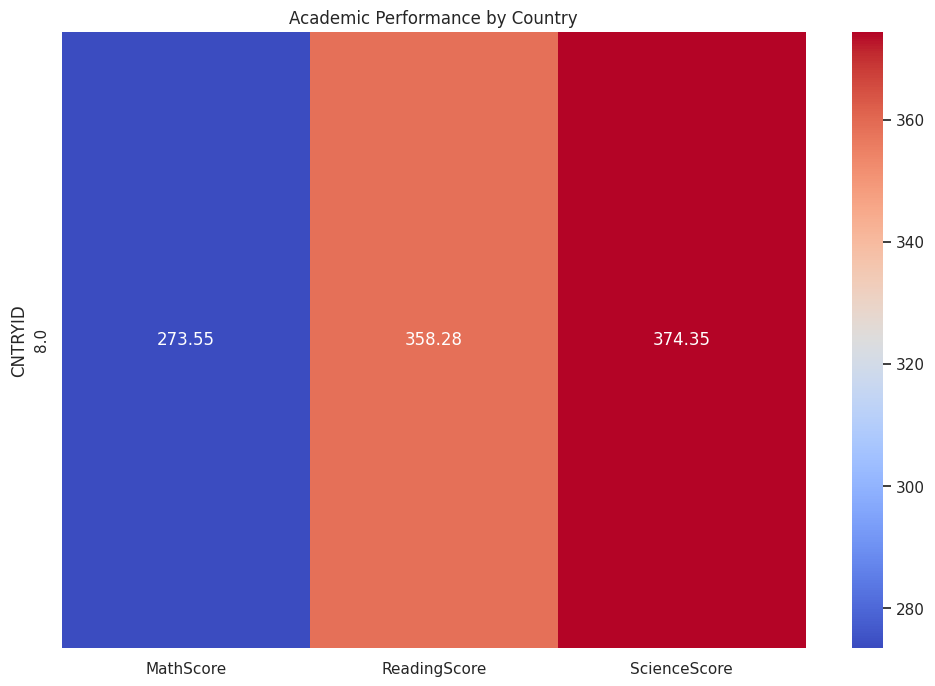

In [57]:
# Групирај ги податоците по држава и пресметај средни вредности
country_performance = df_sample_clean.groupby('CNTRYID')[['MathScore', 'ReadingScore', 'ScienceScore']].mean()

# Направи heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(country_performance, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Academic Performance by Country')
plt.show()


In [58]:
# Проверка на уникатни вредности пред и по пополнувањето
print(df_sample['CNTRYID'].unique())  # Пред пополнување
df_sample_clean = df_sample.fillna(df_sample.mean(numeric_only=True))
print(df_sample_clean['CNTRYID'].unique())  # По пополнување


[8.]
[8.]


In [59]:
# Пополнување само на бројчани колони
df_sample_clean = df_sample.copy()
numeric_columns = ['MathScore', 'ReadingScore', 'ScienceScore']
df_sample_clean[numeric_columns] = df_sample[numeric_columns].fillna(df_sample[numeric_columns].mean())

In [60]:
# Проверка на уникатни вредности за држава
print(df_sample_clean['CNTRYID'].unique())  # Ова ќе покажува различни држави

[8.]


In [62]:
# Проверете колку различни држави има во оригиналниот dataframe
print(df_sample['CNTRYID'].nunique())  # Број на уникатни држави
print(df_sample['CNTRYID'].unique())   # Сите уникатни држави

1
[8.]


In [63]:
# Проверете ја оригиналната колона за CNTRYID пред да ги пополните недостасувачките вредности
print(df_sample['CNTRYID'].value_counts())  # Проверка на бројот на секоја држава


CNTRYID
8.0    1000
Name: count, dtype: int64


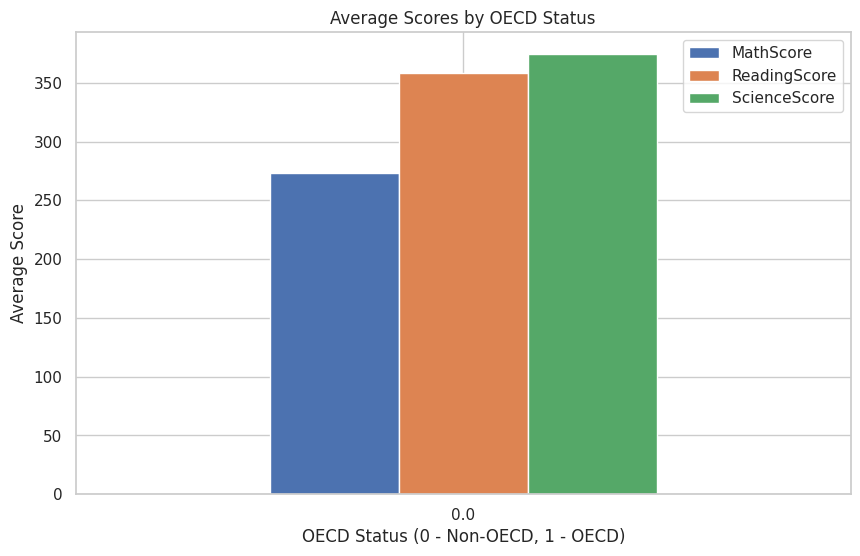

MathScore t-test: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))
ReadingScore t-test: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))
ScienceScore t-test: TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


In [65]:
# Групирање по OECD статус и пресметување на просечни резултати
avg_scores_by_oecd = df_sample_clean.groupby('OECD')[['MathScore', 'ReadingScore', 'ScienceScore']].mean()

# Визуелизација на просечни резултати по OECD статус
import matplotlib.pyplot as plt

# Создавање на бар графикон
avg_scores_by_oecd.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by OECD Status')
plt.xlabel('OECD Status (0 - Non-OECD, 1 - OECD)')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# Ако сакаш да тестираш разлики помеѓу групите, направи t-test:
from scipy.stats import ttest_ind

# Поделување на податоци по OECD статус
oecd_group = df_sample_clean[df_sample_clean['OECD'] == 1]
non_oecd_group = df_sample_clean[df_sample_clean['OECD'] == 0]

# Извршување t-test за секој од предметите
math_ttest = ttest_ind(oecd_group['MathScore'], non_oecd_group['MathScore'])
reading_ttest = ttest_ind(oecd_group['ReadingScore'], non_oecd_group['ReadingScore'])
science_ttest = ttest_ind(oecd_group['ScienceScore'], non_oecd_group['ScienceScore'])

# Печатење на резултати
print("MathScore t-test:", math_ttest)
print("ReadingScore t-test:", reading_ttest)
print("ScienceScore t-test:", science_ttest)

In [66]:
# Проверка на уникатни вредности за OECD
unique_oecd_values = df_sample_clean['OECD'].unique()
print(unique_oecd_values)


[0.]


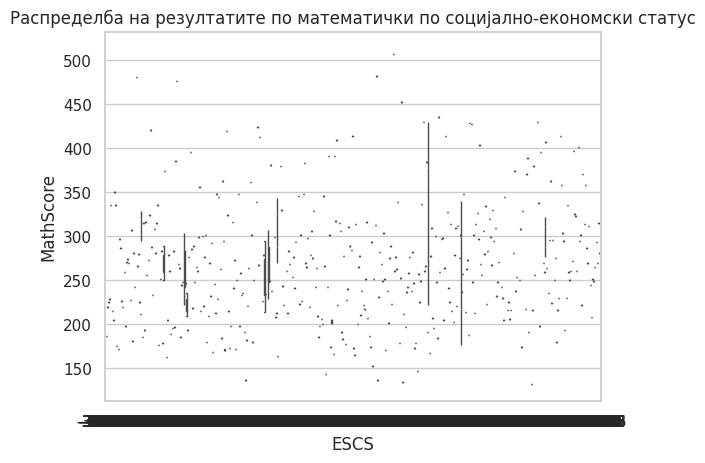

In [70]:
sns.boxplot(x='ESCS', y='MathScore', data=df_sample_clean)
plt.title('Распределба на резултатите по математички по социјално-економски статус')
plt.show()